In [1]:
library('tidyverse')
library('dplyr')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
hatecrime = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/hate-crimes/hate_crimes.csv')
hatecrime %>% print

Parsed with column specification:
cols(
  state = col_character(),
  median_household_income = col_double(),
  share_unemployed_seasonal = col_double(),
  share_population_in_metro_areas = col_double(),
  share_population_with_high_school_degree = col_double(),
  share_non_citizen = col_double(),
  share_white_poverty = col_double(),
  gini_index = col_double(),
  share_non_white = col_double(),
  share_voters_voted_trump = col_double(),
  hate_crimes_per_100k_splc = col_double(),
  avg_hatecrimes_per_100k_fbi = col_double()
)



# A tibble: 51 x 12
   state median_househol… share_unemploye… share_populatio… share_populatio…
   <chr>            <dbl>            <dbl>            <dbl>            <dbl>
 1 Alab…            42278            0.06              0.64            0.821
 2 Alas…            67629            0.064             0.63            0.914
 3 Ariz…            49254            0.063             0.9             0.842
 4 Arka…            44922            0.052             0.69            0.824
 5 Cali…            60487            0.059             0.97            0.806
 6 Colo…            60940            0.04              0.8             0.893
 7 Conn…            70161            0.052             0.94            0.886
 8 Dela…            57522            0.049             0.9             0.874
 9 Dist…            68277            0.067             1               0.871
10 Flor…            46140            0.052             0.96            0.853
# … with 41 more rows, and 7 more variables: share_non_c

In [3]:
hatecrime %>% head

state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.12583893,1.8064105
Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.14374012,1.6567001
Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.22531995,3.4139280
Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.06906077,0.8692089
California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.25580536,2.3979859
Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.39052330,2.8046888


**Data Overview**

This is a dataset about hatecrime across 50 states and District of Columbia in the United States. It consists of 51 rows and 12 columns. Among the 12 columns, only the first column "state" is a character and the rest columns are numeric. The 11 numeric columns provide a variety of characteristics of the states including median household income, percent of population in metropolitan areas, percent of voters voted for Trump, hate crime rate and so forth. In this project, I will conduct some visualization of the dataset using the techniques covered during this semester. The graphs that I would explore include scatter plot, bar graph, and other graphs. 

In [4]:
hatecrime_income_order = hatecrime %>%
                            mutate(state = fct_reorder(state, median_household_income))

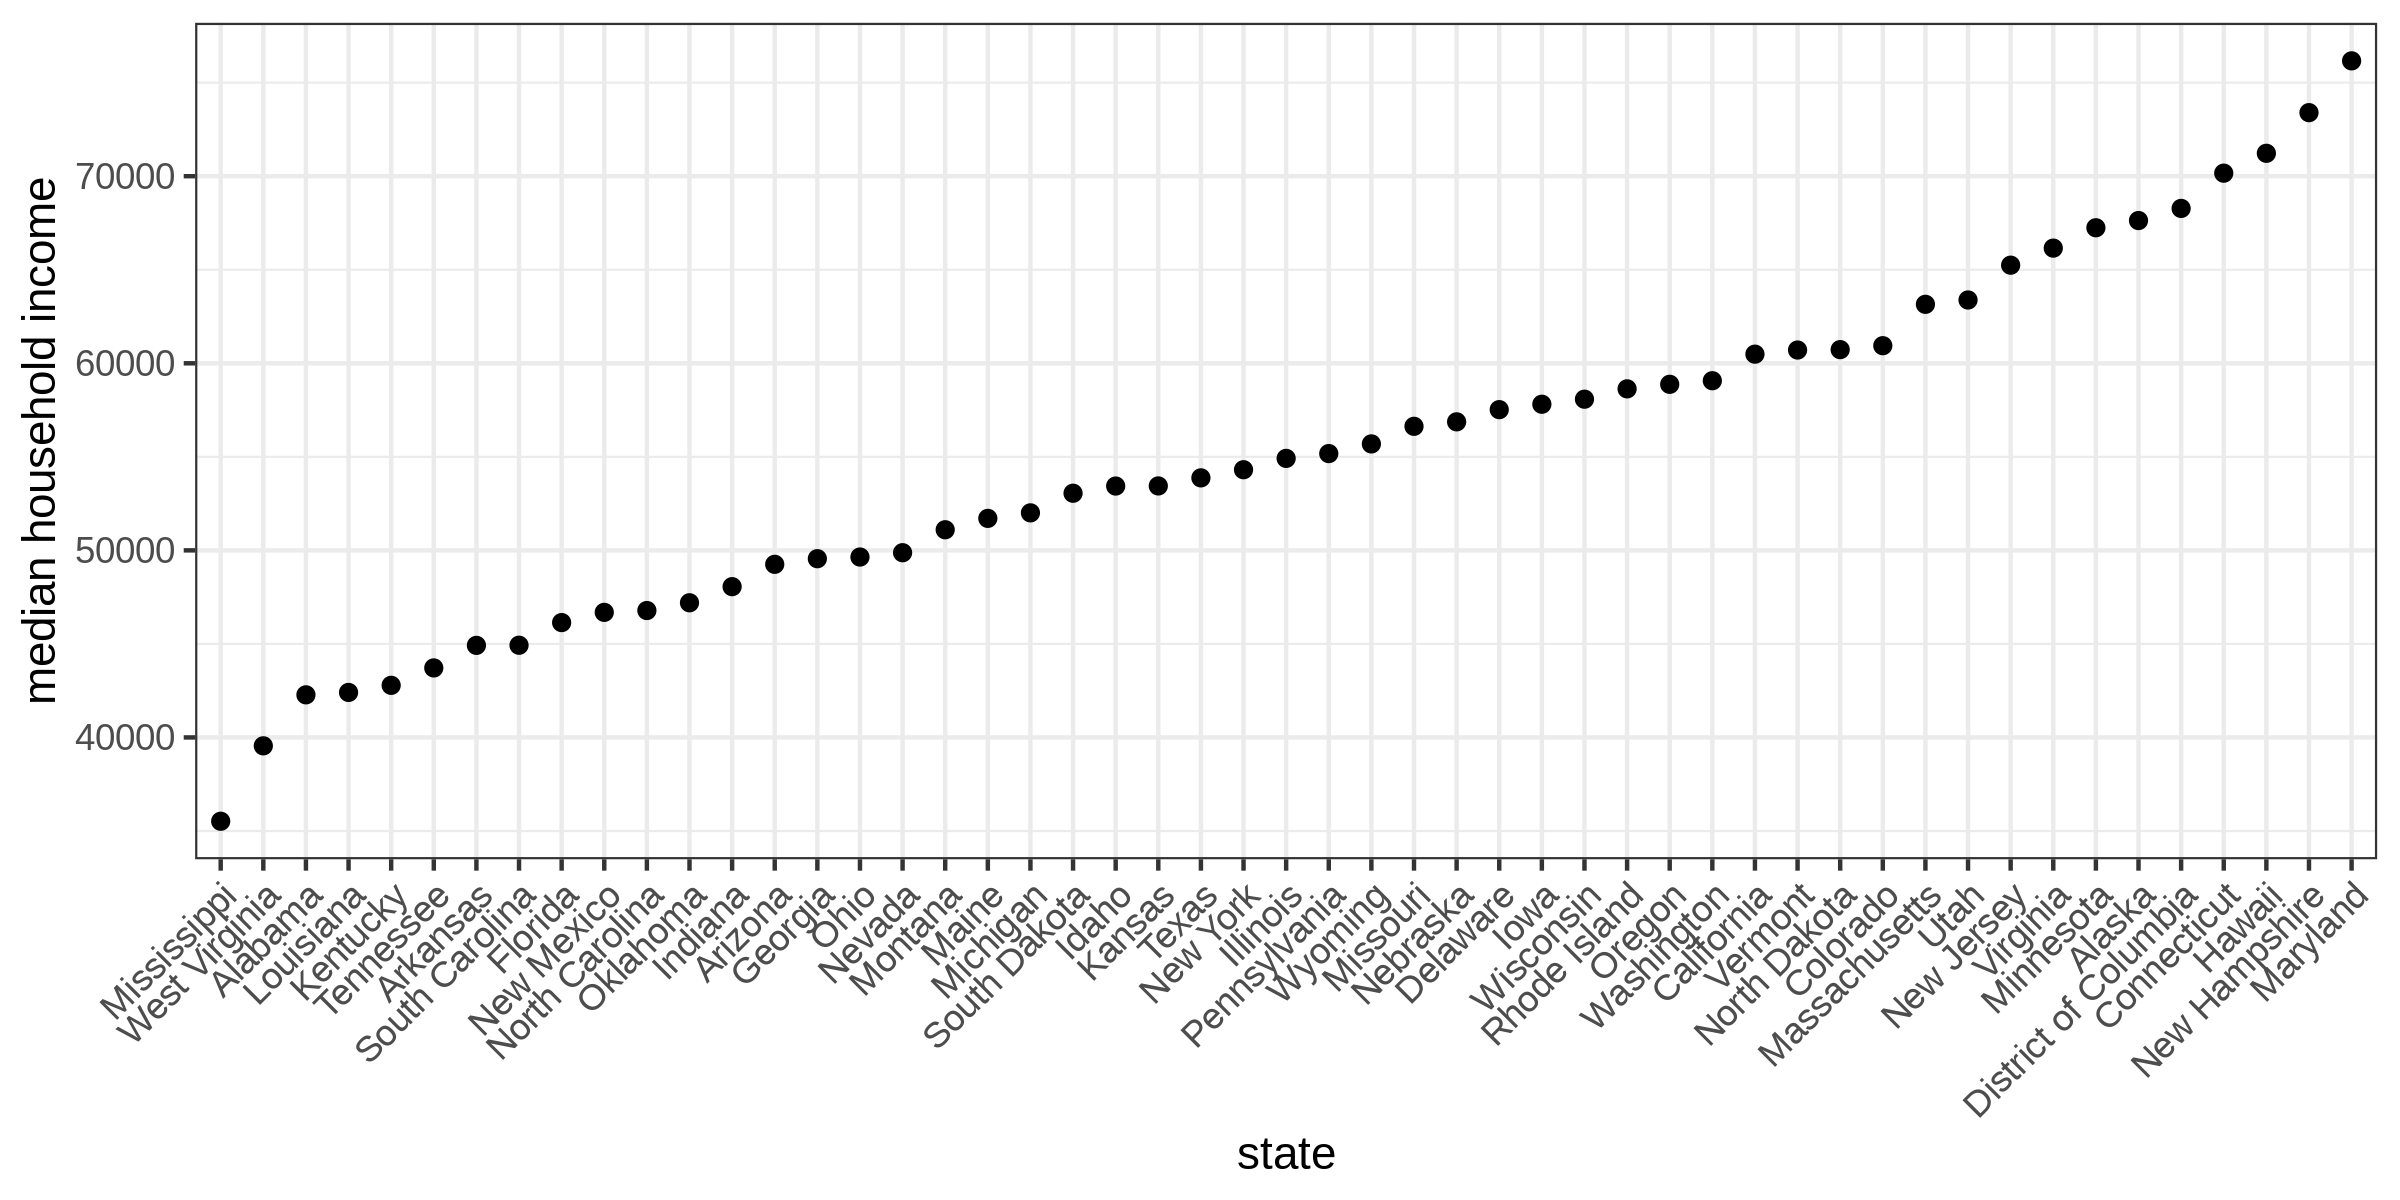

In [5]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

p = ggplot(hatecrime_income_order, aes(x = state, y = median_household_income))
p = p + geom_point()
p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p = p + labs(y = "median household income")
p

**The plot between mdeian household income and state**

The graph above is a scatter plot of `median_household_income` across different `state`s. I put the states on the x-axis in an ascending order according to median household income. Based on the graph, we can see that Mississippi is the state that has the lowest mdeian household income at around 35,000 dollars. It is followed by West Virginia and Alabama as two states with the second and third lowest mdeian household income. By contrast, Maryland is the state with the highest mdeian household income at over 75,000 dollars. New Hampshire and Hawaii have the second and third highest mdeian household income at over 70,000 dollars. Next, I would like to explore another variable called `avg_hatecrimes_per_100k_fbi`.

In [6]:
hatecrime_desc = hatecrime %>%
                     mutate(state = fct_reorder(state, avg_hatecrimes_per_100k_fbi)) %>%
# Since avg_hatecrimes_per_100k_fbi is missing for Hawaii, I would filter it out when doing the bar graph.
                    filter(state != "Hawaii")

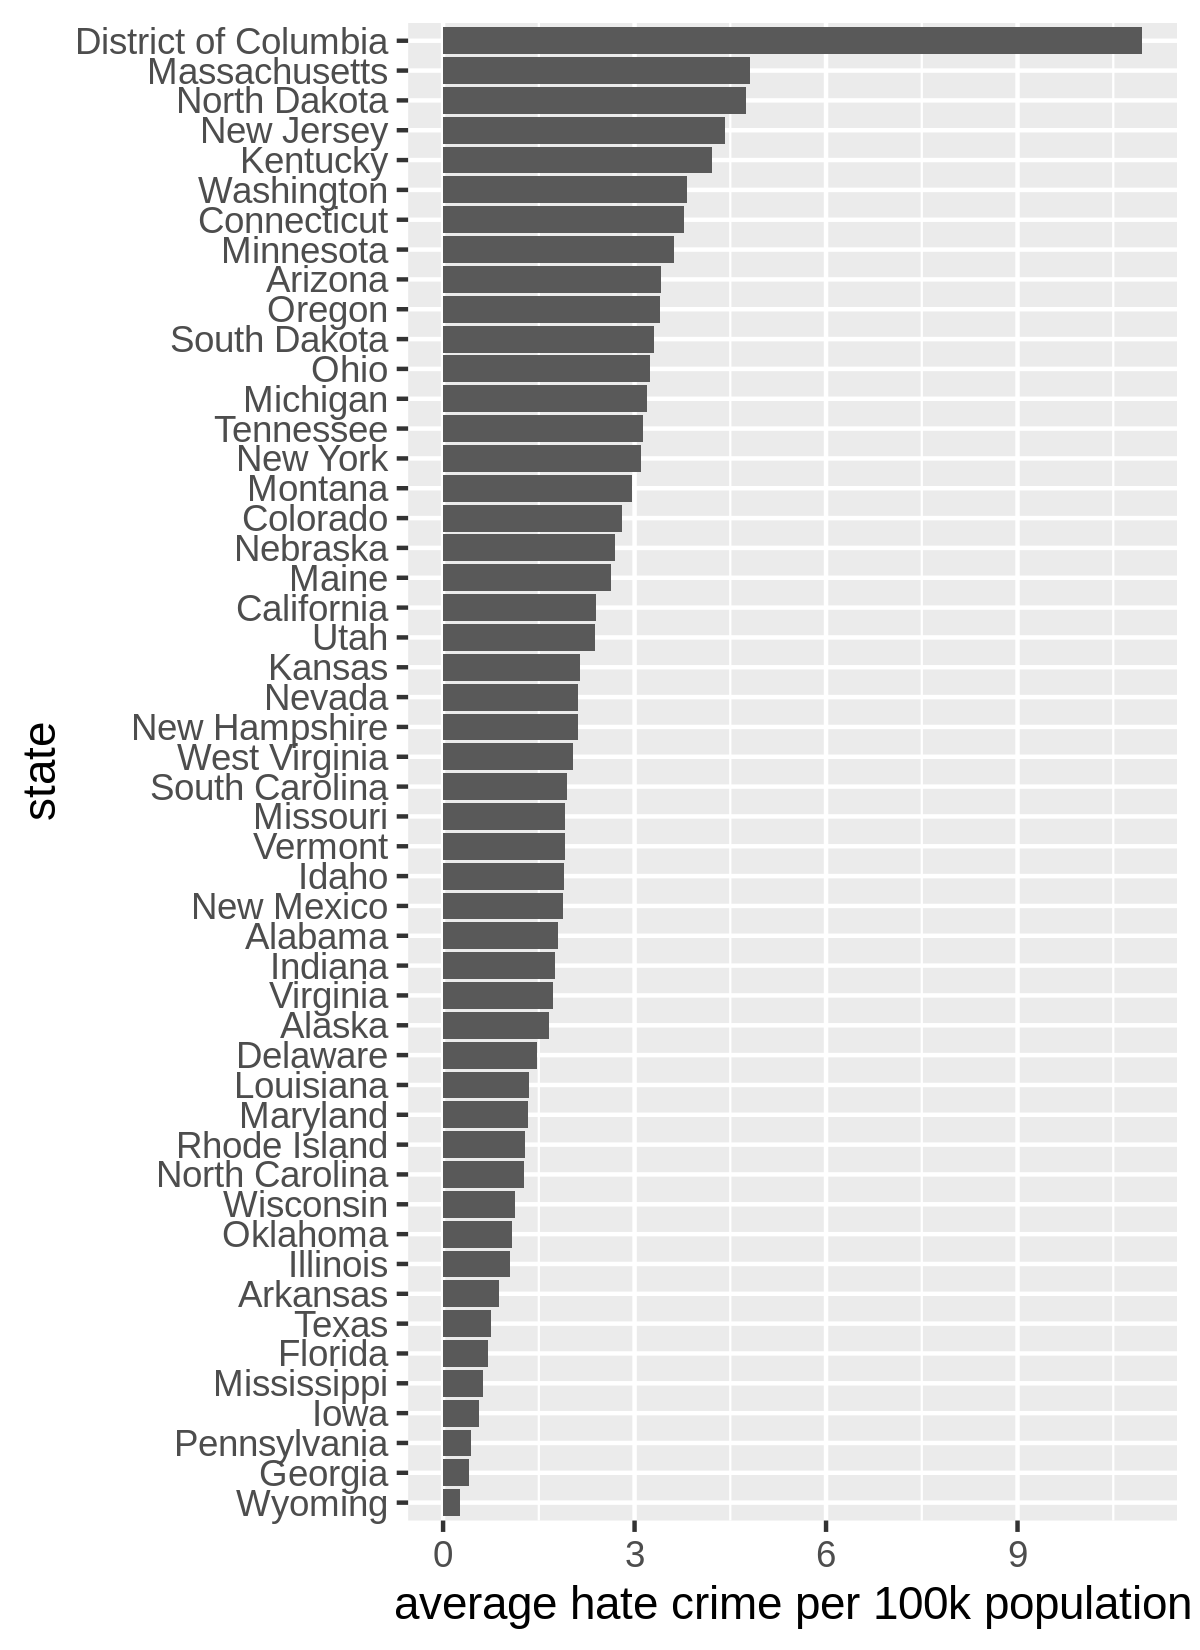

In [7]:
options(repr.plot.width = 4, repr.plot.height = 5.5, repr.plot.res = 300)

p = ggplot(hatecrime_desc, aes(x = avg_hatecrimes_per_100k_fbi, 
                          y = state)
           )
p = p + geom_col()
p = p +labs(x = 'average hate crime per 100k population')
p

**The bar graph between average hate crime per 100k population and state**

The graph above shows the number of average hate crime per 100k population across various regions. D.C. has the highest average hate crime per 100k population and the average hate crime number is more than 2 times that of the region ranked the second in the bar graph. Wyoming has the lowest average hate crime per 100k population, which is followed by Georgia, Pennsylvania, Lowa, and Mississippi. 

Next, for the purpose of this project, I would define the states with `share_voters_voted_trump` more than or equal to 50 percent as Trump supporting states (red), and those with `share_voters_voted_trump` less than 50 percent as states that are not Trump supporting. Then I will conduct some data visualizations based on it. 

Warning message:
“Removed 1 rows containing missing values (geom_point).”


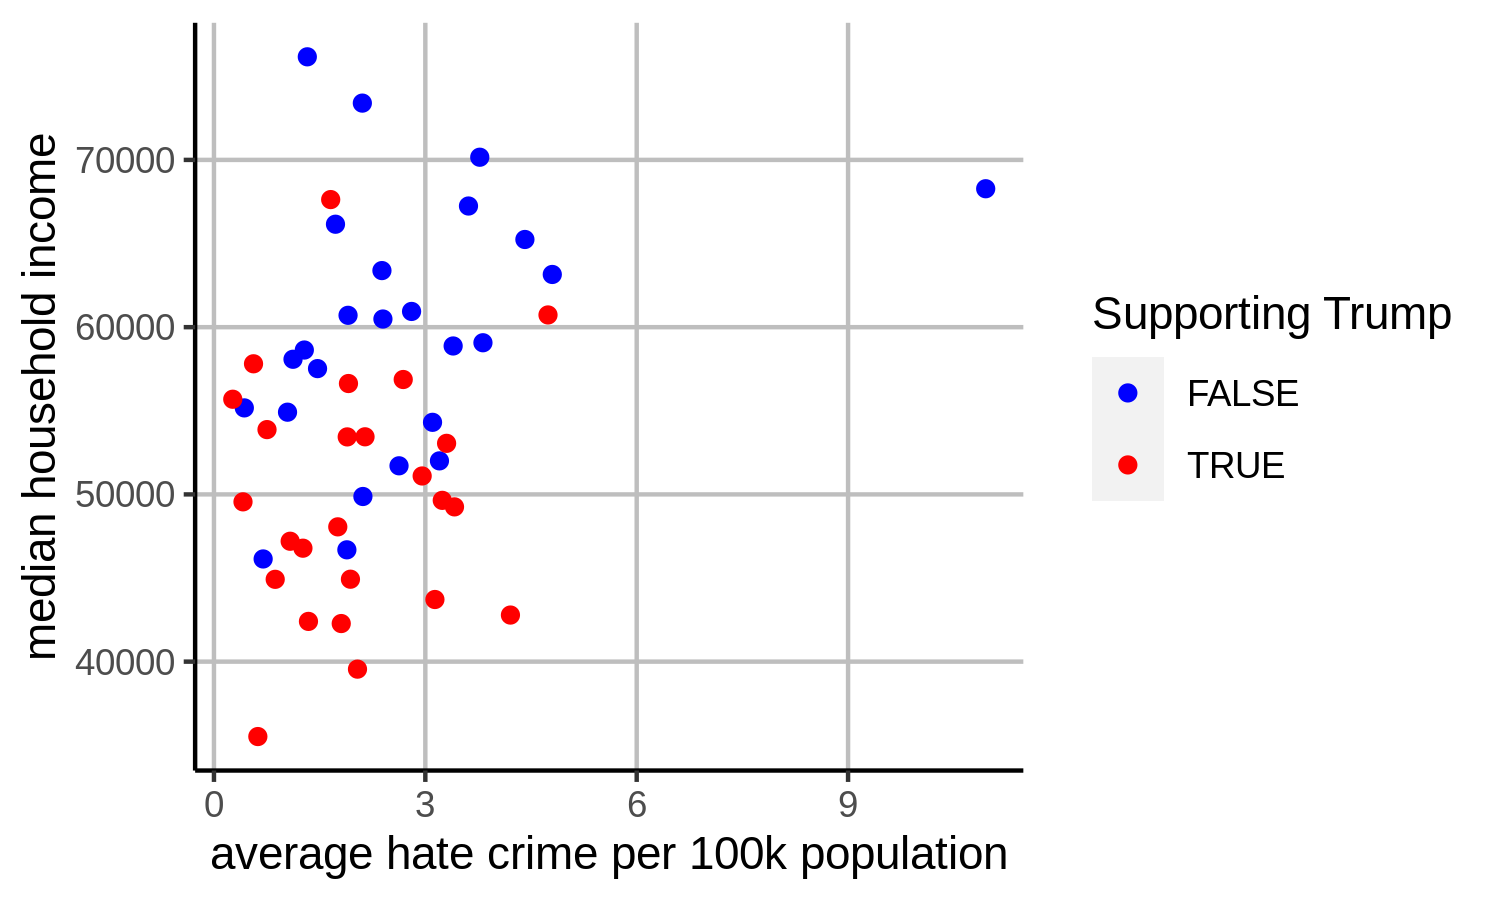

In [8]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(hatecrime, aes(x=avg_hatecrimes_per_100k_fbi,
                             y=median_household_income,
                         colour = share_voters_voted_trump >= 0.5))
p = p + geom_point()
p = p + scale_colour_manual(name = 'Supporting Trump', values = setNames(c('red','blue'),c(T, F)))
p = p + labs(x = "average hate crime per 100k population", y = "median household income")
p = p + theme(panel.background=element_rect(fill = "white"),
             strip.background=element_rect(fill = "white"),
             axis.line = element_line(size = 0.5, colour = "black"),
             panel.grid.major = element_line(colour = "grey"),
             panel.grid.minor = element_blank())
p

**The plot between average hate crime per 100k population and median household income by whether a state is supporting Trump**

Based on the graph, we can see that red states (supporting Trump) are mostly located at the lower half of the plot indicating a relatively lower median household income, while blue states (not supporting Trump) are mostly located at the upper half of the plot indicating a relatively higher median household income. In terms of the relationship between the two variables, there isn't any clear linear relationship. Most points are located on the left side of the panel. On the right-top corner, there is an obvious outlier that has a high median household income as well as a particularly high average hate crime per 100k population. According to the second plot, we know that this outlier in the plot above is D.C. and based on its `share_voters_voted_trump`, it is not a Trump-supporting state. 

Warning message:
“Removed 1 rows containing missing values (geom_point).”


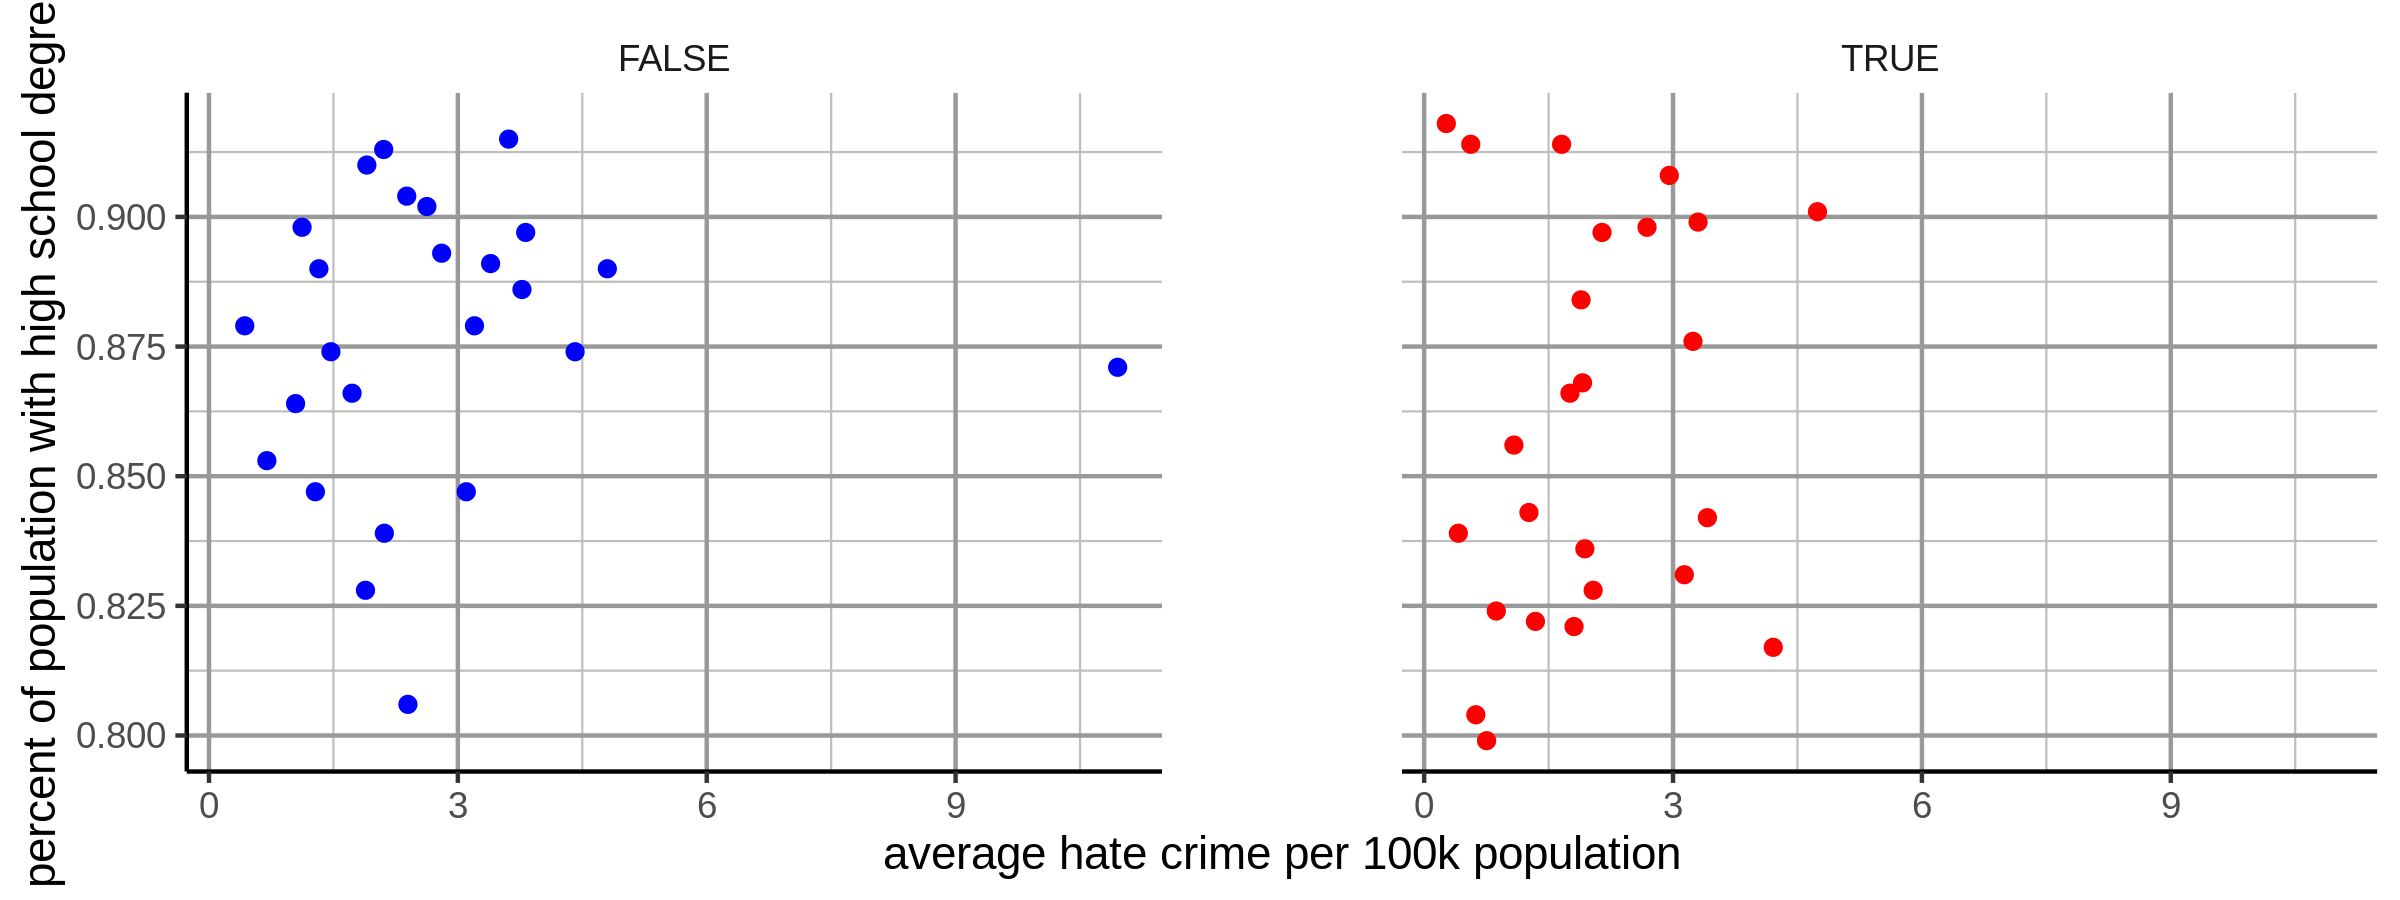

In [43]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(hatecrime, aes(x = avg_hatecrimes_per_100k_fbi, 
                          y = share_population_with_high_school_degree,
                          colour = share_voters_voted_trump >= 0.5))
p = p + geom_point()
p = p + facet_wrap(~ share_voters_voted_trump >= 0.5)
p = p + scale_colour_manual(name = 'Supporting Trump', values = setNames(c('red','blue'),c(T, F)))
p = p + labs( x = "average hate crime per 100k population", y = "percent of population with high school degree") 
p = p + theme(legend.position = 'none',
              panel.background=element_rect(fill = "white"),
              strip.background=element_rect(fill = "white"),
              axis.line = element_line(size = 0.5, colour = "black"),
              panel.spacing = unit(4, "lines"),
              panel.grid.major = element_line(colour = "grey60"),
              panel.grid.minor = element_line(colour = "grey")
             )
p

The two plots above explored the relationship between percent of population with high school degree and average hate crime per 100k population. The plots were split by whether `share_voters_voted_trump` is more than or equal to 50 percent. Similarly as the previous plot, red stands for `share_voters_voted_trump` that is more than or equal to 50 percent and blue stands for `share_voters_voted_trump` that is less than 50 percent. Most of the points are located on the left half of the panels. According to the plots, D.C. is still an outlier as the previous plot. For the blue plot, only 5 of the blue states have less than 85% of population with high school degree. By comparison, the red plot shows that more than 10 red states have less than 85% of population with high school degree. The pattern shown in the plots above between percent of population with high school degree and average hate crime per 100k population is similar to the pattern shown in the previous plot between median household income and average hate crime per 100k population. Therefore, there likely to be some correlation between percent of population with high school degree and median household income. 